In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
file = 'appointments2016.csv'
data = pd.read_csv(file)
data.shape

(110527, 116)

## BASELINE 2016

In [3]:
baseline = 1 - data['No-show'].sum()/len(data['No-show'])
print(baseline)
print(1-baseline)
total_no_shows = data['No-show'].sum()
print(total_no_shows)
print(data.isnull().sum().sum())

0.798067440534892
0.20193255946510802
22319
0


In [4]:
features_to_ignore = ['DateAppointment','TimeScheduled', 'DateScheduled', 'AppointmentID',\
                      'PatientId', 'Neighborhood', 'No-show']
valid_features = [c for c in data.columns if c not in features_to_ignore]
len(valid_features)

109

In [6]:
valid_features.append('No-show')
features_corr = data[valid_features].corr()['No-show'].apply(lambda x: abs(x)).sort_values(ascending=False)
valid_features.remove('No-show')
features = features_corr.index[1:]

## Visualizing how as the time from scheduling grows also the prob of no-show

(0, 0.5)

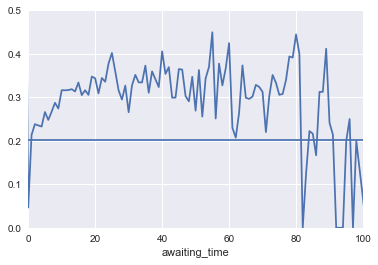

In [15]:
by_day = data.groupby('awaiting_time')['No-show'].mean()
by_day.plot(kind='line')
plt.axhline(1-baseline)
plt.xlim(0,100)
plt.ylim(0,.5)

## Although I have no proof of it. The fact that so many people is no-show having one SMS
## might indicate some leakage

(0.15, 0.35)

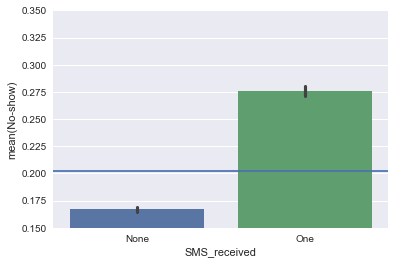

In [48]:
##Is it before the fact?
ax = sns.barplot(x='SMS_received', y='No-show', data=data)#, order=[0, 1, 2, 3])
ax.set_xticklabels(('None','One'))
plt.axhline(1-baseline)
plt.ylim(0.15,.35)

In [137]:
by_nei = data.groupby('Neighborhood')['No-show'].mean()
by_nei[0]
values_nei = []
names_nei = []
for feat, num in enumerate(by_nei):
    values_nei.append(num)
    names_nei.append(feat)


## Neighborhoods

(0, 0.25)

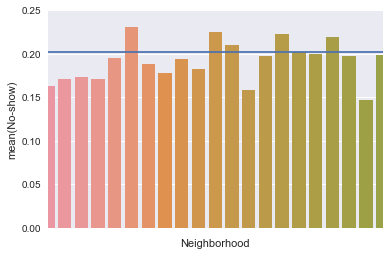

In [126]:
ax = sns.barplot(x='Neighborhood', y='No-show', data=data, ci=0)#, order=[0, 1, 2, 3])
ax.set_xticklabels('')
plt.axhline(1-baseline)
plt.xlim(0,20)
plt.ylim(0,0.25)

## Appointments missed could be (as common sense indicates) a good indicator

(0, 13)

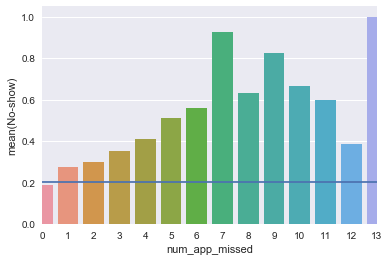

In [71]:
ax = sns.barplot(x='num_app_missed', y='No-show', data=data, ci=0)#, order=[0, 1, 2, 3])
#ax.set_xticklabels(('None','One'))
plt.axhline(1-baseline)
plt.xlim(0,13)

## What part of the day the appointment was scheduled.
## I have my suspicious that it is actually the time of the appointment (no proof either)

1.0    72325
2.0    36033
0.0     1578
3.0      591
Name: session, dtype: int64


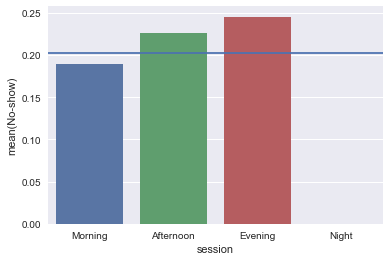

In [76]:
ax = sns.barplot(x='session', y='No-show', data=data, ci=0, order=[1, 2, 3, 4])
ax.set_xticklabels(('Morning','Afternoon', 'Evening', 'Night'))
plt.axhline(1-baseline)
print(data['session'].value_counts())

## Hypertension

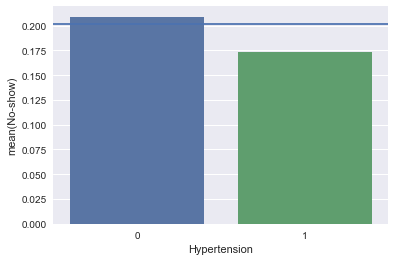

In [79]:
ax = sns.barplot(x='Hypertension', y='No-show', data=data, ci=0)#, order=[1, 2, 3, 4])
#ax.set_xticklabels((0,1))
plt.axhline(1-baseline)

## Events. Surprisingly, rain and thnderstorm does not affect much the outcome.
## Maybe, are they no days of rain or thunderstorm?

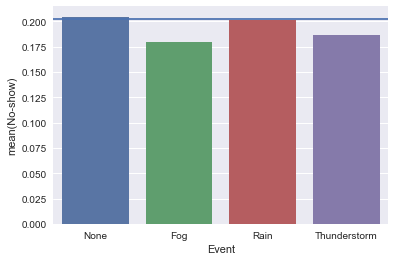

In [82]:
ax = sns.barplot(x='Event', y='No-show', data=data, ci=0)#, order=[1, 2, 3, 4])
ax.set_xticklabels(('None','Fog', 'Rain', 'Thunderstorm'))
plt.axhline(1-baseline)

## Age

(0, 0.3)

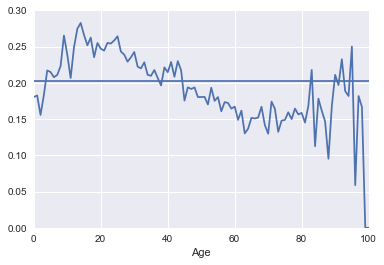

In [14]:
by_day = data.groupby('Age')['No-show'].mean()
by_day.plot(kind='line')
plt.axhline(1-baseline)
plt.xlim(0,100)
plt.ylim(0,0.3)

(0.15, 0.22)

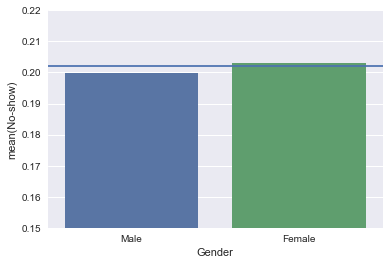

In [86]:
ax = sns.barplot(x='Gender', y='No-show', data=data, ci=0)#, order=[1, 2, 3, 4])
ax.set_xticklabels(('Male','Female'))
plt.axhline(1-baseline)
plt.ylim(0.15,.22)

In [15]:
data.columns[0:20]
conditions = ['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']

## Day of the week

(0.12, 0.26)

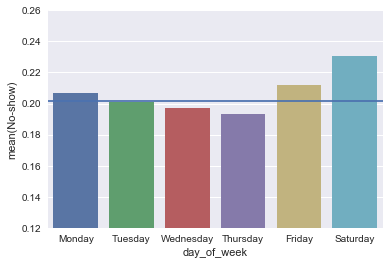

In [75]:
ax = sns.barplot(x='day_of_week', y='No-show', data=data, order=[1, 2, 3, 4, 5, 6], ci=0)
ax.set_xticklabels(('Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'))
plt.axhline(1-baseline)
plt.ylim(0.12,.26)

## Heatmap. Values are not too high: bad news

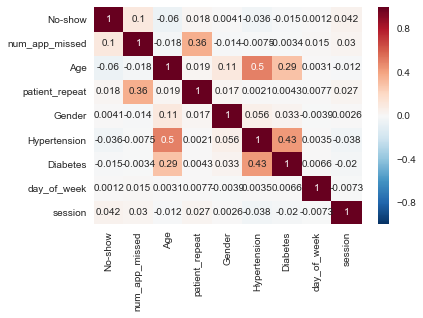

In [16]:
corr = data[['No-show', 'num_app_missed', 'Age', 'patient_repeat', 'Gender', 'Hypertension', 'Diabetes', 'day_of_week', 'session']].corr()
sns.heatmap(corr, annot=True)

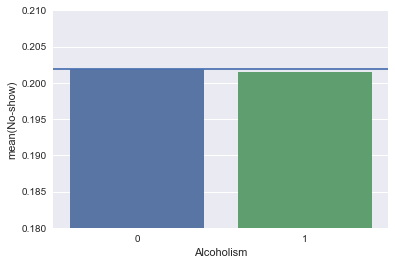

In [92]:
sns.barplot(x='Alcoholism', y='No-show', data=data, ci=0)
plt.ylim(0.18,.21)
plt.axhline(1-baseline)